In [2]:
import pandas as pd

# Load the dataset (top 100k rows)
data = pd.read_csv("/Users/tanishqbakliwal/Desktop/quarter 5/ALY6980 capstone project/Agent data.csv", nrows=100000)

# Inspect the first few rows and get column info
print(data.head())

    Id    f_name     l_name                                      website  \
0  1.0     Rommy        Shy       http://www.royaltyrealty.co/rommy-shy/   
1  2.0    Joseph    Polizzi                   http://www.teampolizzi.com   
2  3.0       Amy     Carter         http://www.bedfordareahomes4sale.com   
3  4.0     Susan     Tucker                         http://Susan Tucker,   
4  5.0  Kathlene  Holzhauer  https://kathlene.novapropertiesforsale.com/   

                                               email  lic_num lic_num_state  \
0  rshy@royaltyrealty.co|info@royaltyrealty.co|sy...  1874848            CA   
1                        joepolizzirealtor@gmail.com  8638279            NJ   
2  ccpa@marketleader.com|info@marketleader.com|dm...      NaN           NaN   
3                                                NaN  7837325            NJ   
4  consumerprivacy@boomtownroi.com|kathlene@teamd...      NaN           NaN   

      otherlic   broker_lic_state           phone  \
0      1874848 

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                99999 non-null  float64
 1   f_name            99998 non-null  object 
 2   l_name            99881 non-null  object 
 3   website           82457 non-null  object 
 4   email             82426 non-null  object 
 5   lic_num           50618 non-null  object 
 6   lic_num_state     50617 non-null  object 
 7   otherlic          56729 non-null  object 
 8   broker_lic_state  56593 non-null  object 
 9   phone             98686 non-null  object 
 10  brokername        93937 non-null  object 
 11  address           94799 non-null  object 
 12  description       99941 non-null  object 
 13  team              12615 non-null  object 
 14  service_area      88924 non-null  object 
 15  jobtitle          22956 non-null  object 
 16  specialities      94779 non-null  objec

In [4]:
# Check the shape of your dataset before one-hot encoding
print(data.shape)


(100000, 19)


In [5]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Id                      1
f_name                  2
l_name                119
website             17543
email               17574
lic_num             49382
lic_num_state       49383
otherlic            43271
broker_lic_state    43407
phone                1314
brokername           6063
address              5201
description            59
team                87385
service_area        11076
jobtitle            77044
specialities         5221
languages           87272
rating                295
dtype: int64


In [6]:
# Check number of unique values in each categorical column
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
unique_values_count = data[categorical_cols].nunique()
print(unique_values_count)


f_name              12212
l_name              48660
website             79195
email               36035
lic_num             50432
lic_num_state          58
otherlic            55868
broker_lic_state    12521
phone               97821
brokername          49958
address             80177
description         99154
team                12606
service_area        75629
jobtitle            18601
specialities         7689
languages             834
dtype: int64


In [7]:
# For example, filling numerical columns with the median
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

# For categorical columns, you can fill with the mode or a placeholder
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [8]:
# 3. Remove duplicates
data = data.drop_duplicates()

In [9]:
# 4. Reset the index
data.reset_index(drop=True, inplace=True)

In [10]:
# 5. Convert data types if necessary
# Example: Convert rating to float (if it's not already)
data['rating'] = data['rating'].astype(float)

In [12]:
# 6. Inspect the cleaned data
print("Cleaned Data Info:")
print(data.info())
print(data.head())

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                100000 non-null  float64
 1   f_name            100000 non-null  object 
 2   l_name            100000 non-null  object 
 3   website           100000 non-null  object 
 4   email             100000 non-null  object 
 5   lic_num           100000 non-null  object 
 6   lic_num_state     100000 non-null  object 
 7   otherlic          100000 non-null  object 
 8   broker_lic_state  100000 non-null  object 
 9   phone             100000 non-null  object 
 10  brokername        100000 non-null  object 
 11  address           100000 non-null  object 
 12  description       100000 non-null  object 
 13  team              100000 non-null  object 
 14  service_area      100000 non-null  object 
 15  jobtitle          100000 non-null  object 
 16  sp

In [13]:
# Check if there are any missing values in the DataFrame
if data.isnull().values.any():
    print("There are missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")

There are no missing values in the dataset.


In [14]:
# Identify numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Drop non-numeric columns before scaling
data_numeric = data[numeric_cols]


In [ ]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Convert categorical columns to one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


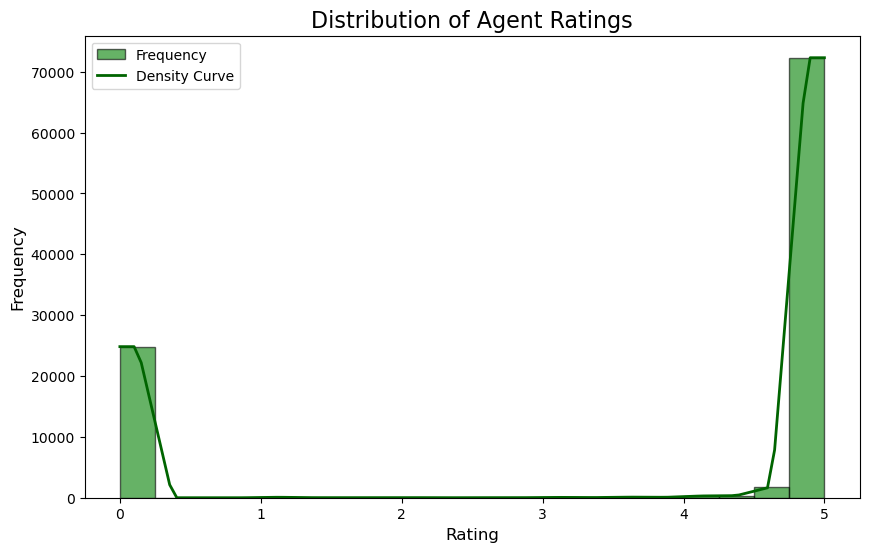

In [11]:
# Question: What is the distribution of ratings given to real estate agents?

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Plot histogram and density curve
plt.figure(figsize=(10, 6))

# Histogram of the ratings
plt.hist(data['rating'], bins=20, color='green', alpha=0.6, edgecolor='black', label='Frequency')

# Density curve overlay
density = np.histogram(data['rating'], bins=20, density=True)
x_vals = np.linspace(min(data['rating']), max(data['rating']), 100)
density_vals = np.interp(x_vals, (density[1][1:] + density[1][:-1]) / 2, density[0])
plt.plot(x_vals, density_vals * len(data['rating']) * (density[1][1] - density[1][0]), color='darkgreen', linewidth=2, label='Density Curve')

# Title and labels
plt.title("Distribution of Agent Ratings", fontsize=16)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()

plt.show()


                             Broker Name  Number of Agents
0                 Keller Williams Realty              7425
1                        Keller Williams               838
2                        Coldwell Banker               764
3  Coldwell Banker Residential Brokerage               736
4                                Compass               646
5                             eXp Realty               475
6                           Howard Hanna               305
7        Berkshire Hathaway HomeServices               241
8      Howard Hanna Real Estate Services               224
9       Berkshire Hathaway Home Services               214


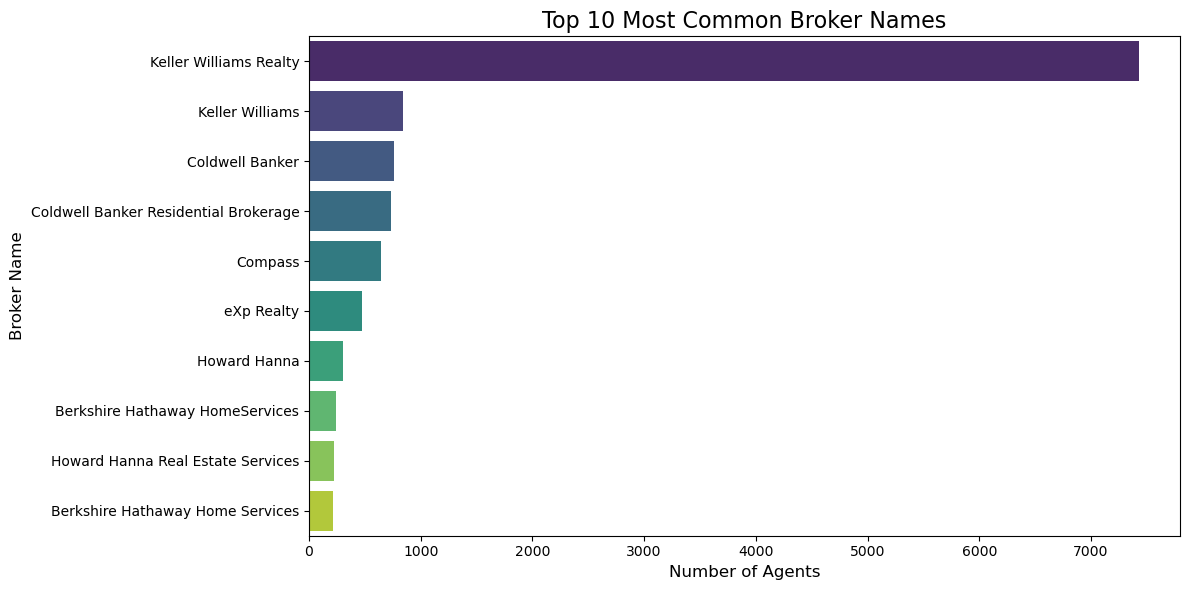

In [12]:
# Question: Which brokers have the highest number of associated agents?

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Count top 10 brokers and create a DataFrame
top_10_brokers_df = data['brokername'].value_counts().nlargest(10).reset_index()
top_10_brokers_df.columns = ['Broker Name', 'Number of Agents']

# Display the DataFrame to verify structure
print(top_10_brokers_df)

# Plot the data with a horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(y='Broker Name', x='Number of Agents', data=top_10_brokers_df, palette="viridis")
plt.title("Top 10 Most Common Broker Names", fontsize=16)
plt.xlabel("Number of Agents", fontsize=12)
plt.ylabel("Broker Name", fontsize=12)

# Adjust layout to fit all elements clearly
plt.tight_layout()
plt.show()


             Service Area  Number of Agents
0           Manhattan, NY             11784
1         Los Angeles, CA               912
2              Dallas, TX               777
3              Denver, CO               754
4             Chicago, IL               686
5               Miami, FL               651
6             Houston, TX               628
7       Orange County, CA               626
8             Seattle, WA               616
9  Los Angeles County, CA               571


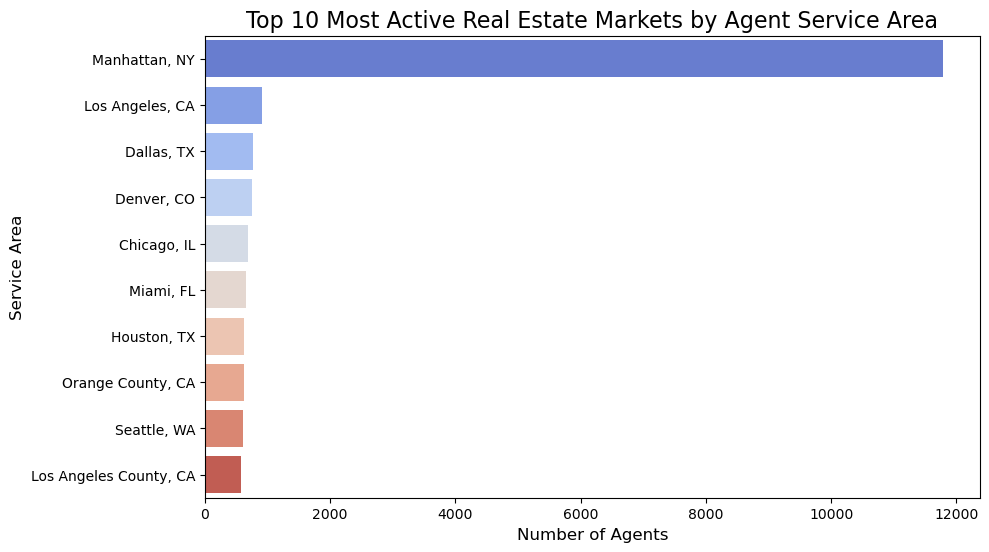

In [13]:
# Question: Which service areas have the highest concentration of real estate agents?


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count each service area (separated by '|') and get the top 10
service_areas_expanded = data['service_area'].str.split('|', expand=True).stack().str.strip().value_counts().nlargest(10)

# Create a DataFrame with a stable index for consistent plotting
service_areas_df = pd.DataFrame({
    'Service Area': service_areas_expanded.index,
    'Number of Agents': service_areas_expanded.values
})

# Display top 10 service areas to verify structure
print(service_areas_df)

# Plot the data with aligned labels using a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y='Service Area', x='Number of Agents', data=service_areas_df, palette="coolwarm", orient='h')
plt.title("Top 10 Most Active Real Estate Markets by Agent Service Area", fontsize=16)
plt.xlabel("Number of Agents", fontsize=12)
plt.ylabel("Service Area", fontsize=12)
plt.show()


English                100000
 Spanish                95549
 French                  1297
 Mandarin                 937
 Russian                  880
 German                   716
 Portuguese               688
 Italian                  667
 Hindi                    546
 Arabic                   441
 Cantonese                433
 Polish                   330
 Farsi                    330
 Korean                   325
 Hebrew                   323
 Vietnamese               322
 Tagalog (Filipino)       250
 Greek                    227
 Japanese                 208
 Punjabi                  149
 Urdu                     129
 Turkish                  111
 Hungarian                101
 Bengali                   87
 Thai                      85
Name: count, dtype: int64


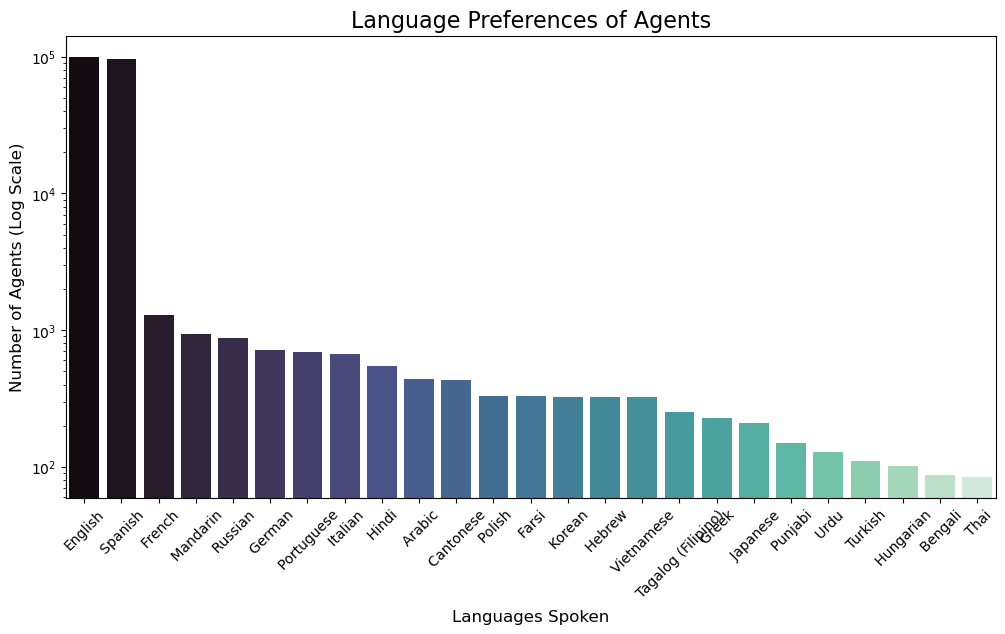

In [14]:
# Question: What are the most commonly spoken languages by real estate agents?



# Count each language spoken by agents
languages_expanded = data['languages'].str.split('|', expand=True).stack().value_counts()

# Display the language preferences of agents
print(languages_expanded)

plt.figure(figsize=(12, 6))
sns.barplot(x=languages_expanded.index, y=languages_expanded.values, palette="mako")
plt.yscale("log")  # Set y-axis to logarithmic scale
plt.title("Language Preferences of Agents", fontsize=16)
plt.ylabel("Number of Agents (Log Scale)", fontsize=12)
plt.xlabel("Languages Spoken", fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  # Corrected this import
from sklearn.metrics import mean_squared_error

# Encoding categorical variables
label_encoder = LabelEncoder()
data['jobtitle_encoded'] = label_encoder.fit_transform(data['jobtitle'])
data['languages_encoded'] = label_encoder.fit_transform(data['languages'])
data['specialities_encoded'] = label_encoder.fit_transform(data['specialities'])
data['brokername_encoded'] = label_encoder.fit_transform(data['brokername'])

# Define features and target
X = data[['jobtitle_encoded', 'languages_encoded', 'specialities_encoded', 'brokername_encoded']]
y = data['rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 4.53705263408719


In [27]:
from sklearn.preprocessing import LabelEncoder

# Example: Apply Label Encoding to a categorical column
label_encoder = LabelEncoder()
data['team_encoded'] = label_encoder.fit_transform(data['team'])

# View the first few rows of the data to see the result
print(data[['team', 'team_encoded']].head())

# Optionally, view the mapping of labels to values
print("Label encoding mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label}: {i}")

           team  team_encoded
0  Andrea Gines           550
1  Andrea Gines           550
2  Andrea Gines           550
3  Andrea Gines           550
4  Andrea Gines           550
Label encoding mapping:
(Lauren) Brooke Greenbaum|Erin Birely|Earl Martin|Ray Brusca: 0
AJ Lall|Melissa Longton: 1
AJ MacVittie|Kelsie Wetherell|Camey Whalen|Leslie Moug: 2
AJ Nowak: 3
ANA Dias: 4
Aaron Aiken|MaryAnn Ross: 5
Aaron Anderson: 6
Aaron Arnow|Andre Golanski|Mishel Solovyeva|Ron Kitzmiller: 7
Aaron Bloodworth: 8
Aaron Boone|Adams Realty|Darren Adams|Bethany Armontrout|Brandie Kinnaman|Karen Johannaber|Larry Thomas|Codey Hendren: 9
Aaron Brohm|Kristen Honeycutt|Robbie Tickel|Sherrie Bradley|Ann Whitener|Britney Houdek|Austen Giesie: 10
Aaron Cena: 11
Aaron Dworsky|Evan Todd|Amber Whitaker|Cari Sherrill|Sue Milne|Leah Phillips|Britt Sarver|Brook Eldridge|Caleb Eldridge|Jereme Bennett Stone|Sue Zimmermam: 12
Aaron Frank Torres: 13
Aaron Khosh: 14
Aaron Lathrop|Sara Rocheford|Patricia Hughes|Jason Sund

In [31]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns that need encoding (you can choose relevant columns)
categorical_cols = ['f_name', 'l_name', 'website', 'email', 'lic_num', 
                    'lic_num_state', 'otherlic', 'broker_lic_state', 
                    'phone', 'brokername', 'address', 'description', 'team', 
                    'service_area', 'jobtitle', 'specialities', 'languages']

label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col].astype(str))  # Convert to string first if necessary

# Check the result
print(data.head())


    Id  f_name  l_name  website  email  lic_num  lic_num_state  otherlic  \
0  1.0    9305   38600    60917  29884     9781              6     11076   
1  2.0    5610   33299    64690  18856    37026             34       190   
2  3.0     709    7815    34019   5511    28707              6       569   
3  4.0   10330   42352     4513     63    35878             34     39669   
4  5.0    5942   19409    70778   6825    28707              6       190   

   broker_lic_state  phone  ...  service_area  jobtitle  specialities  \
0              9064  75959  ...         54896     15752          3493   
1              9064  96599  ...         38616     15752          5176   
2              9064  41753  ...         64933     15752          6141   
3             10603  86006  ...         75260     15752           152   
4              9064  57657  ...         62180     14130          7244   

   languages  rating  jobtitle_encoded  languages_encoded  \
0        497     4.9             15752     

In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Step 3: Split Data into Features (X) and Target (y)
X = data.drop(['rating'], axis=1)  # Features (replace 'rating' with your actual target column if different)
y = data['rating']  # Target (assuming 'rating' is continuous)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Apply scaling to the features

# Step 5: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make Predictions and Evaluate the Model
y_pred = model.predict(X_test)

# Step 8: Evaluate Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3.8613696430939686
R-squared: 0.16342956168646683


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Data Preparation (Ensure all encoding and preprocessing is done before this)
# Assuming data is already preprocessed (encoded categorical columns, handled missing values, etc.)

# Split the data into features (X) and target (y)
X = data.drop(['rating'], axis=1)  # Drop target column (replace 'rating' with your actual target)
y = data['rating']  # Assuming 'rating' is continuous

# Step 2: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training set
X_test_scaled = scaler.transform(X_test)  # Transform on test set

# Step 4: Initialize the Models
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Step 5: Train and Evaluate Models
results = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate metrics for training set
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Calculate metrics for test set
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Store the results
    results.append({
        'Model': model_name,
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train R²': train_r2,
        'Test R²': test_r2
    })

# Step 6: Create a DataFrame to show results
results_df = pd.DataFrame(results)

# Step 7: Display the results
print(results_df)


               Model     Train MSE  Test MSE     Train MAE  Test MAE  \
0      Decision Tree  1.429810e-33  6.478260  1.609823e-18  1.353285   
1      Random Forest  4.700510e-01  3.347939  4.996716e-01  1.352875   
2  Gradient Boosting  3.203708e+00  3.250407  1.345910e+00  1.358686   

   Train R²   Test R²  
0  1.000000 -0.403523  
1  0.897802  0.274665  
2  0.303453  0.295795  
